<a href="https://colab.research.google.com/github/SafeiaSherif/medical_students_dataset/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1. Removing messing values

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**As we see, the column 'Cabin' is useless as it contains 687 null values from 891 total values so we can remove it.**

In [5]:
df.drop(columns='Cabin', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


# 1. Removing the outliers

In [8]:
q1 = df['Age'].quantile(0.1) # the quantile of 10%
q9 = df['Age'].quantile(0.9) # the quantile of 90%
mask = df['Age'].between(q1, q9) # identify the data between them
df = df[mask] # removing the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  578 non-null    int64  
 1   Survived     578 non-null    int64  
 2   Pclass       578 non-null    int64  
 3   Name         578 non-null    object 
 4   Sex          578 non-null    object 
 5   Age          578 non-null    float64
 6   SibSp        578 non-null    int64  
 7   Parch        578 non-null    int64  
 8   Ticket       578 non-null    object 
 9   Fare         578 non-null    float64
 10  Embarked     578 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 54.2+ KB


In [10]:
q1 = df['Fare'].quantile(0.1) # the quantile of 10%
q9 = df['Fare'].quantile(0.9) # the quantile of 90%
mask = df['Fare'].between(q1, q9) # identify the data between them
df = df[mask] # removing the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 1 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  463 non-null    int64  
 1   Survived     463 non-null    int64  
 2   Pclass       463 non-null    int64  
 3   Name         463 non-null    object 
 4   Sex          463 non-null    object 
 5   Age          463 non-null    float64
 6   SibSp        463 non-null    int64  
 7   Parch        463 non-null    int64  
 8   Ticket       463 non-null    object 
 9   Fare         463 non-null    float64
 10  Embarked     463 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 43.4+ KB


# 2. Summary statistics

Numerical data

In [11]:
df[['Age', 'Fare']].describe()

,Age,Fare
count,463.000000,463.000000
mean,29.437365,21.527033
std,9.125292,18.213232
min,14.000000,7.650000
25%,22.000000,8.050000
50%,28.000000,13.000000
75%,35.500000,26.337500
max,50.000000,79.650000


Categorical data

In [12]:
males = df['Sex'].value_counts()['male']
females = df['Sex'].value_counts()['female']

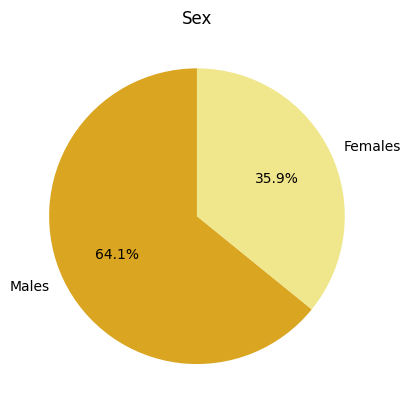

In [13]:
plt.pie([males, females], labels=["Males", "Females"],
        colors=["goldenrod", "khaki"],
        startangle=90, autopct='%1.1f%%')

plt.title("Sex")
plt.show()

In [14]:
Survived = df['Survived'].value_counts()[1]
Not_Survived = df['Survived'].value_counts()[0]

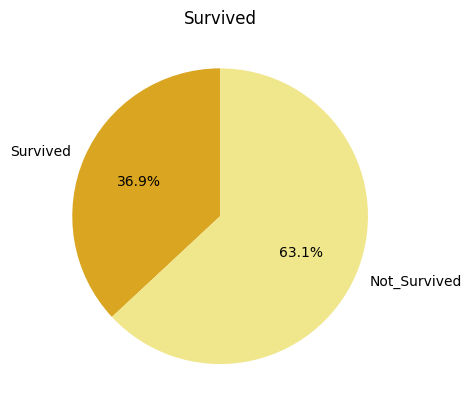

In [15]:
plt.pie([Survived, Not_Survived], labels=["Survived", "Not_Survived"],
        colors=["goldenrod", "khaki"],
        startangle=90, autopct='%1.1f%%')

plt.title("Survived")
plt.show()

Survived counts for each sex

In [16]:
survivedByGender = df.groupby("Sex")["Survived"].value_counts()

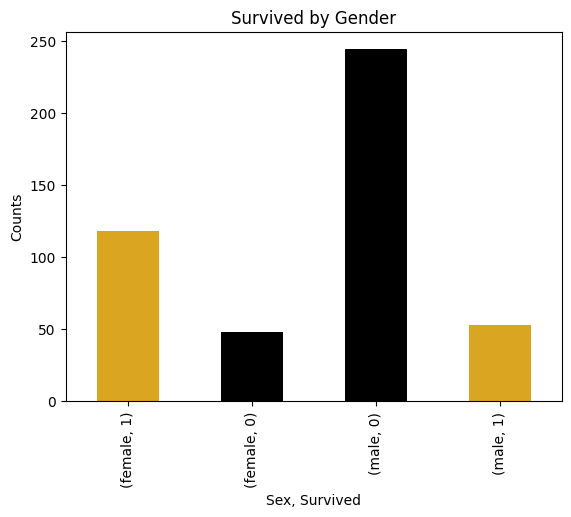

In [17]:
survivedByGender.plot(
    kind="bar",
    xlabel="Sex, Survived",
    ylabel="Counts",
    title="Survived by Gender",
    color=["goldenrod", "black", "black", "goldenrod"]
);

# 3. Visualization using Histogram

(array([32., 75., 54., 74., 55., 57., 39., 26., 24., 27.]),
 array([14. , 17.6, 21.2, 24.8, 28.4, 32. , 35.6, 39.2, 42.8, 46.4, 50. ]),
 <BarContainer object of 10 artists>)

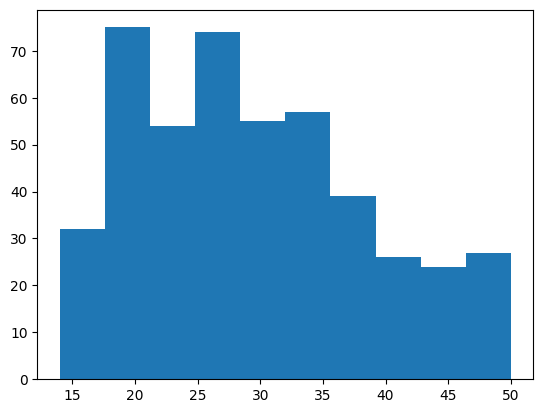

In [18]:
plt.hist(df['Age'])

(array([260.,  43.,  65.,  22.,  12.,   7.,  27.,   4.,   6.,  17.]),
 array([ 7.65, 14.85, 22.05, 29.25, 36.45, 43.65, 50.85, 58.05, 65.25,
        72.45, 79.65]),
 <BarContainer object of 10 artists>)

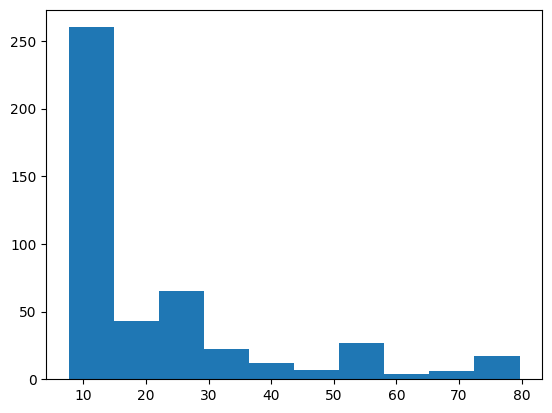

In [19]:
plt.hist(df['Fare'])

In [23]:
df.to_excel("Clean_Titanic_Data.xlsx")